# Prerequisites

- Algebra for lattices

# Theory

- [Daniele Micciancio slides](https://simons.berkeley.edu/sites/default/files/docs/14953/intro.pdf) + [talk](https://www.youtube.com/watch?v=21IzHN9-CjE)
- [Intro video](https://www.youtube.com/watch?v=QDdOoYdb748) 

## Lattices

**Lattices -- Definition**  
Let $B=(b_1, ...,b_n) \in \mathbb{R}^n$ be a set of *linearly independent vectors* (a basis of $\mathbb R^n$). 
A lattice $\mathcal L$ with dimension n is the set of vectors
$$\mathcal{L}(b_1, \dots, b_n) = \mathbb Z b_1 + \mathbb Z b_2 + ... \mathbb Zb_n = \sum_{i=1}^n\mathbb Z b_i = \left \{ \sum_{i=1}^{n} a_ib_i : a_i \in \mathbb{Z} \right \}$$


Using vector notations we can define the lattice as $\mathcal{L}(B) = \{Bx:x\in \mathbb{Z}^n\}$ - Which conveys the idea that the lattice represents all the **integer** vectors transformed by the basis. The basis vectors in $B$ are said to **generate** or **span** the lattice.

A lattice is called complete if $\dim(\mathcal{L}) = n$

**Linear independence -- Reminder**  
We say a set of vectors are linearly independent if the only solution to the equation $\sum_i a_ib_i = 0$  is when all $a_i$ are zero. 


**Note**
- A lattice can admit multiple bases => $B' = BU$ for a matrix $U$ with $\det(U) = \pm 1$
 
*Intuition*
- Points on an infinite checkerboard.
- In the case of $n = 1$ (the real number line), the lattice $\mathcal L(b) = \mathbb Z b $ has only 2 possible bases: $b$ and $-b$.  


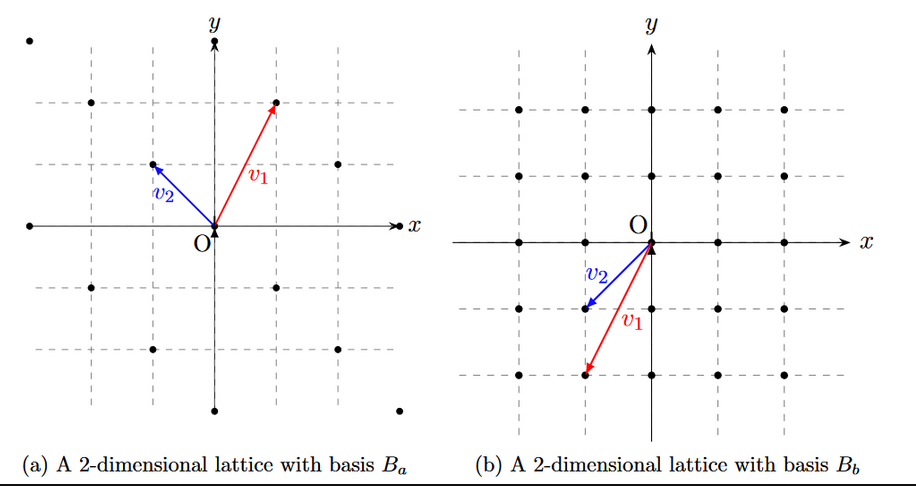
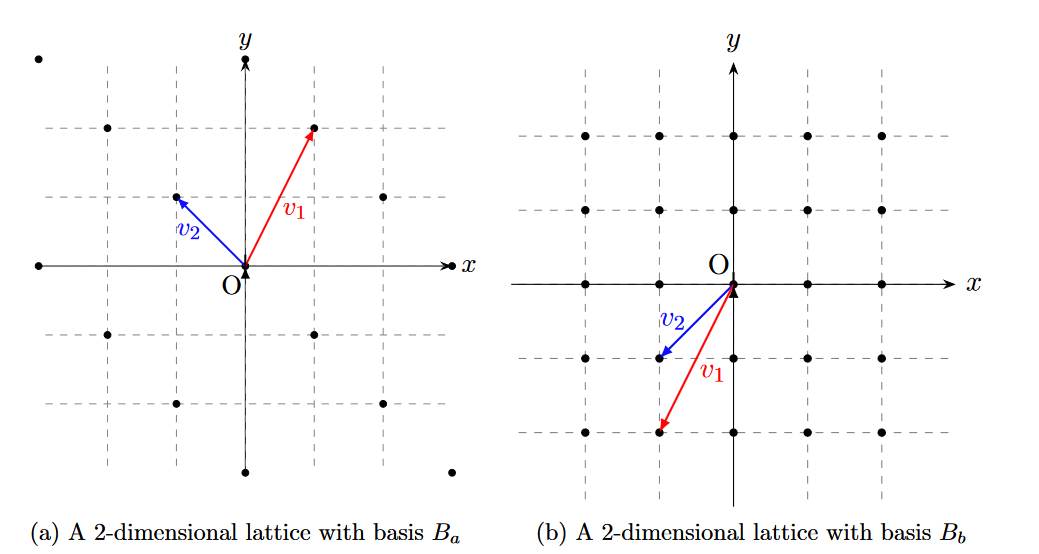

**Determinant**  
$\det(\mathcal{L}(B)) = |\det(B)|$ -- This determinant is independent of the choice of the basis. It has a geometric meaning: the volume of the $n$-dimensional fundamental paralleliped (defined below)

Let $B_1, B_2$ be 2 basis. Then $B_2 = B_1U$ for some $U$ with $\det(U) =\pm 1$. Then we have 
$$|\det (B_2)| = |\det (B_1U) = |\det(B_1) \det (U)| = |\pm \det (B_1)| = |\det (B_1)|$$

In [1]:
from sage.modules.free_module_integer import IntegerLattice

In [2]:
M = matrix([[0, 1], [1, 0]])

# the vector is in the lattice
vector([2, 3]) in span(M)

True

In [3]:
L = IntegerLattice(M)
L

Free module of degree 2 and rank 2 over Integer Ring
User basis matrix:
[0 1]
[1 0]

In [4]:
print(L.basis_matrix())

[0 1]
[1 0]


In [5]:
print(L.base_ring())

Integer Ring


In [6]:
print(L.dimension())

2


In [7]:
print(vector([2, 3]) in L.span(L.basis_matrix()))

True


In [8]:
for v in list(L.some_elements())[:10]:
    print(v)

(0, 1)
(1, 1)
(0, 1)
(-1, 2)
(-2, 3)
(-3, 4)
(-4, 5)
(-5, 6)
(-6, 7)
(-7, 8)


In [14]:
M2 = matrix([[1, 1], [2, 1]])

In [15]:
L2 = IntegerLattice(M2)
L2

Free module of degree 2 and rank 2 over Integer Ring
User basis matrix:
[ 0 -1]
[ 1  0]

In [16]:
# Same space 
L == L2

True

In [17]:
from fpylll import IntegerMatrix

In [18]:
M = IntegerMatrix.from_matrix([[2, 0], [1, 1]])

We can generalize the concept of the lattice basis to any set of $m$ linearly independent vectors in $\mathbb R^n$ ($m \leq n$). 

Let $n \geq 1$ and let $B = (b_1, ... b_m)$ with $m < n$ be a set of $m$ linearly independent  vectors. The $m$-dimensional lattice spanned by these vectors in the $\mathbb R^n$ is defined:
$$\mathcal{L}(b_1, \dots, b_m) = \mathbb Z b_1 + \mathbb Z b_2 + ... \mathbb Zb_m = \sum_{i=1}^m\mathbb Z b_i = \left \{ \sum_{i=1}^{m} a_ib_i : a_i \in \mathbb{Z} \right \}$$

**Remark**
- We can always choose a subspace of $\mathbb R^n$ such that the lattice $\mathcal L$ is complete - the subspace generated by $b_i$.
**Gram matrix**  
The Gram matrix $\Delta \mathcal L$ of a lattice $\mathcal L$ is the $m \times m$ matrix in which the $(i, j)$ entry is the scalar product of the $i$-th and $j$-th basis vectors
$$\Delta \mathcal L = b_i \cdot b_j = BB^T$$

The volume of a lattice is equal to the square root of the determinant of the Gram matrix:
$$\det(\mathcal L) = \sqrt {\det (BB^T)}$$

In [45]:
M = matrix(ZZ, [[-7, -7, 4, -8, -8], [1, 6, -5, 8, -1], [-1, 1, 4, -7, 8]])
L = IntegerLattice(M)
L

Free module of degree 5 and rank 3 over Integer Ring
User basis matrix:
[-6  6 -2  1 -2]
[ 0 -7  1 -1 -7]
[-7  0  3 -7 -1]

In [46]:
# Gram matrix 
delta_L = M * M.T
delta_L

[ 242 -125    8]
[-125  127  -79]
[   8  -79  131]

In [52]:
print(L.volume())
print(sqrt(delta_L.determinant()))
print(sqrt(L.gram_matrix().determinant()))

sqrt(618829)
sqrt(618829)
sqrt(618829)


### Fundamental parallelipiped

**Fundamental domain (parallelipiped / mesh)**  
Let $\mathcal{L}$ be a lattice of dimension $n$ and let $b_1,b_2,...,b_n$ be a basis for $\mathcal{L}$. The **fundamental domain** for $\mathcal{L}$ corresponding to this basis is the set  
$$\mathcal{F}(b_1,...,b_n)=\{t_1b_1+t_2b_2+···+t_nb_n:0≤t_i<1\} = B \cdot [0, 1)^n$$
- We can center the domain => $B \cdot \left[- \dfrac 1 2, \dfrac 1 2\right)^n$

**Note**
- We can generate the whole $\mathbb{R}^n$ using the fundamental parellipiped $\mathcal{F}(B)$ - by shifting it.
- $\mathbb{R}^n = \bigcup_{v \in \mathcal{L}} v + \mathcal{F}(B)$.
- We can **partition** the space in fundamental domains.

*Group theory Intuition*
- $(\mathcal{L}, +)$ is a subgroup of $(\mathbb{R}^n, +)$
- We can form the quotient group $\mathbb{R}^n / \mathcal{L}$. Elements of this group are cosets $t + \mathcal{L}$

**Theorem**  
$\det(\mathcal{L}(B)) = vol(\mathcal{F}(B))$

Although the fundamental mesh is not unique, the volume of the fundamental mesh is constant. This means that we can define the **volume** of the lattice as the volume of the fundamental mesh.


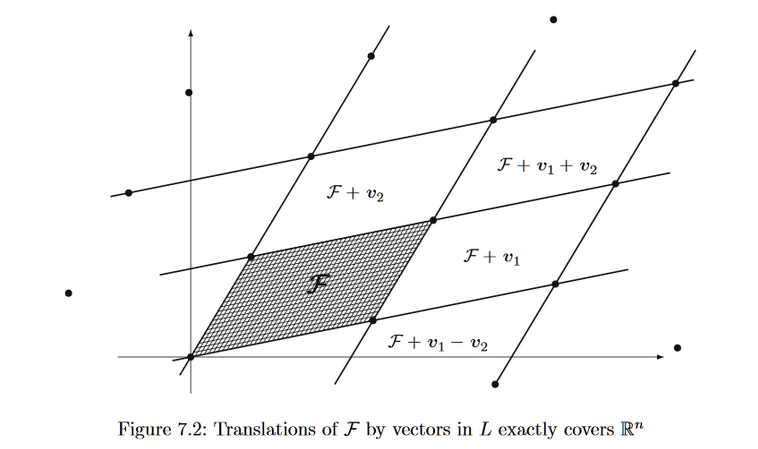
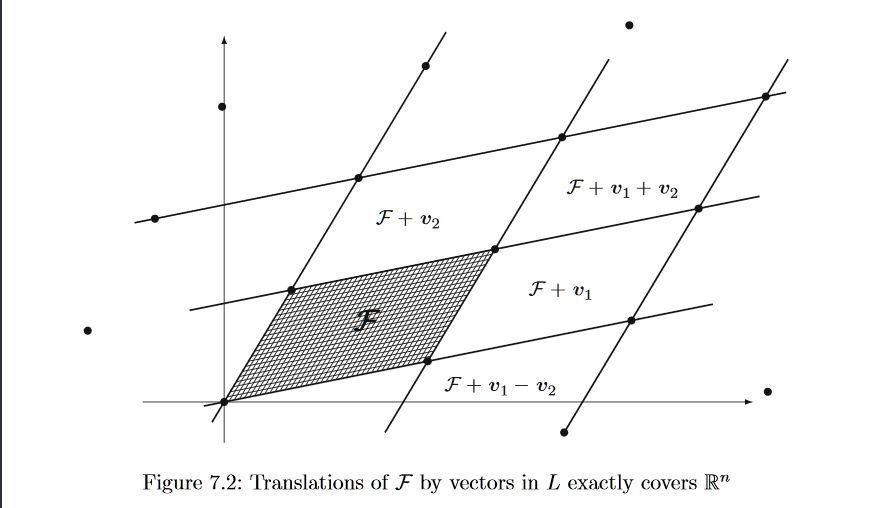

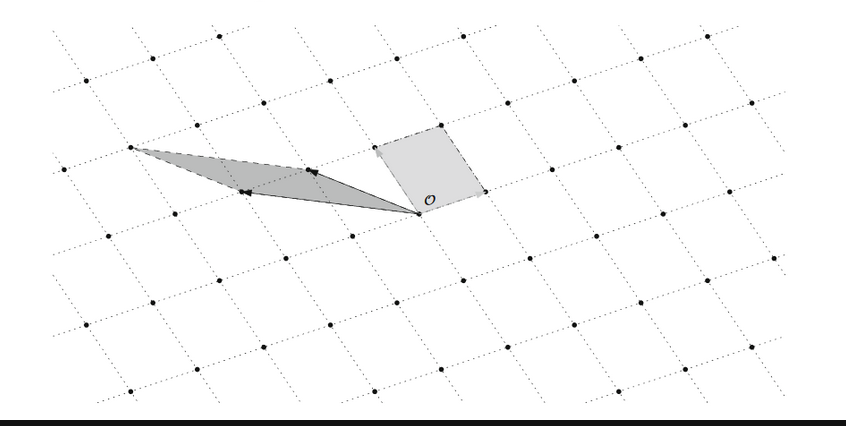
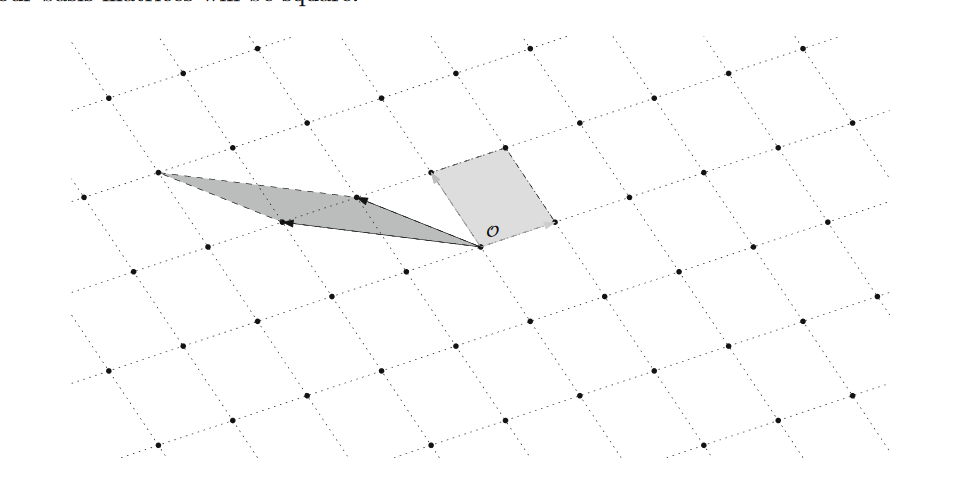

### Short vectors

**Distance function**  
The distance from a vector $t$ to the lattice is the distance from the vector $t$ to the closest point in the in lattice:
$$\mu(t, \mathcal{L}) = \underset{v \in \mathcal{L}}{\min}{\|t-v\|}$$

**Minimum distance**  
Minimum distance of a lattice $\mathcal{L}$ is the length of the shortest nonzero lattice vector:
$$\lambda_1 = \min \|v\|, \ v \in \mathcal{L} \backslash \{0\}$$

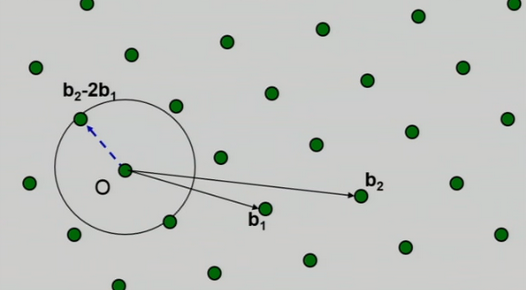
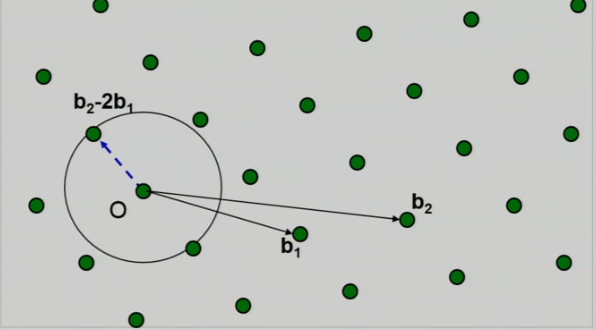

**Shortest vectors**  
Using the definition above we can define **successive minimums**. For example, $\lambda_2$, the **second minimum**, is the smallest real number $r$ such that there exist two linearly independent vectors $v_1, v_2 \in \mathcal L$ such that $|v_1|, |v_2| \leq r$.
$$\lambda_i(\mathcal{L}) = \min \{r:\mathcal{L} \text{ contains $i$ linearly independent vectors of length}≤r\}$$
The successive minima are weakly increasing:  
$\lambda_1(\mathcal{L}) \leq \lambda_2(\mathcal{L}) \leq ... \leq \lambda_n(\mathcal{L})$

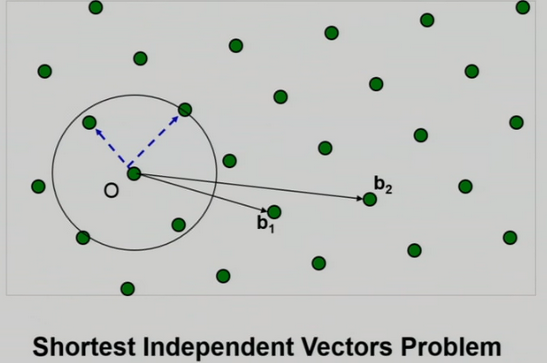

## Lattice Duals

[Wikipedia entry](https://en.wikipedia.org/wiki/Dual_lattice)

**Vector space dual -- definition**  
The dual of a vector space $V$ is the set $V^\vee = Hom(V, \mathbb{R})$ of linear functions $\phi : V \to \mathbb{R}$  
Every linear function can be represented as a vector  $x \in V$  
Notation: $\phi_x(y) = x \cdot y$ - dot product

*Intuition*: TODO

**Dual lattice -- Definition**  
The dual of a lattice $\mathcal{L}^*$ is the set of all vectors $x \in span(L)$ s.t. $x\cdot y \in \mathbb{Z} \ \forall y \in \mathcal{L}$

**Examples**
- $(\mathbb{Z}^n)^\vee = \mathbb{Z}^n$ = The dot product of all vectors in $\mathbb{Z}^n$ stays in $\mathbb{Z}$
- Scaling $(q \cdot \mathcal{L})^\vee = \dfrac 1 q  \cdot \mathcal{L}^\vee$

**Properties**
- $\mathcal{L}_1 \subseteq \mathcal{L}_2 \iff \mathcal{L}^\vee_2 \subseteq \mathcal{L}^\vee_1$
- $(\mathcal{L}^\vee)^\vee =\mathcal{L}$
- For $x \in \mathcal{L}, \  y \in \mathcal{L}^\vee$
    - $x \cdot y \in \mathbb{Z}$
    - $x + y$ has no geometric meaning, they are in different spaces
- each dual vector $y\in \mathcal{L}^\vee$ **partitions** $\mathcal{L}$ into layers orthogonal to $y$
- 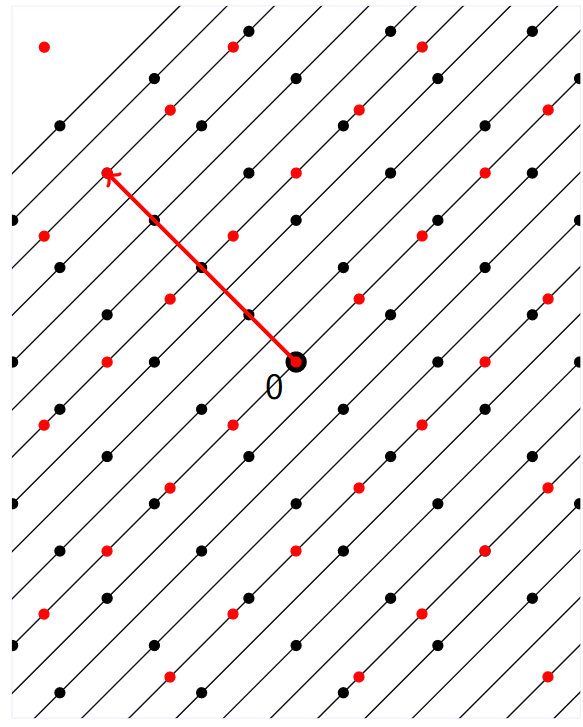


## Q-ary lattices

**Definition**  
Let $A \in \mathbb{Z}^{n \times d}_q$ be a matrix  
Definition 1: $q\mathbb{Z^d} \subseteq \mathcal{L} \subseteq \mathbb{Z^n}$  
Definition 2: $\mathcal{L}_q(A) = \{x : x \bmod q \in A^T \mathbb{Z}^n_q \} \subset \mathbb{Z^d}$  
Definition 3: $\mathcal{L}^\perp_q(A) = \{x : Ax = 0 \bmod q \} \subset \mathbb{Z^d}$

*Intuition*
- $q\mathbb{Z^d} \subseteq \mathcal{L}$ is periodic $\bmod q$
- We use arithmetic $\bmod q$

**Note**
- $\mathcal{L}^\perp_q(A) \neq \mathcal{L}_q(A)$
- They are each other's dual

*Proof*  
Let 
- $x \in \mathcal{L}_q(A)$
- $x' \in \mathcal{L}^\perp_q(A)$  

Then 
- $x = A^T \cdot z \bmod q$
- $Ax = 0 \bmod q$

So $x^T \cdot x = (z^TA) \cdot x' = z^T \cdot (Ax') \in q\mathbb{Z}$

In [ ]:
# Sage doesn't have direct Q-ary lattices so we make them from the basis

In [14]:
n = 5
d = 3
q = random_prime(101)
A = random_matrix(Zmod(q), d, n)  # row vectors
A

[1 0 2 2 1]
[1 2 2 1 0]
[2 2 2 1 2]

In [15]:
A.echelonize()

In [16]:
N = A.change_ring(ZZ)
S = matrix(ZZ, n - d, d).augment(q * identity_matrix(n - d))
N.stack(S, subdivide=True)

[1 0 0 0 2]
[0 1 0 1 1]
[0 0 1 1 1]
[---------]
[0 0 0 3 0]
[0 0 0 0 3]

## Hard problems

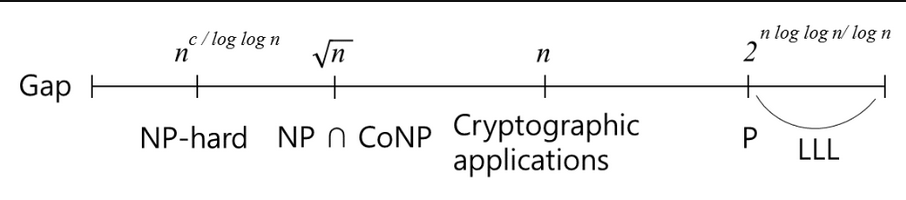
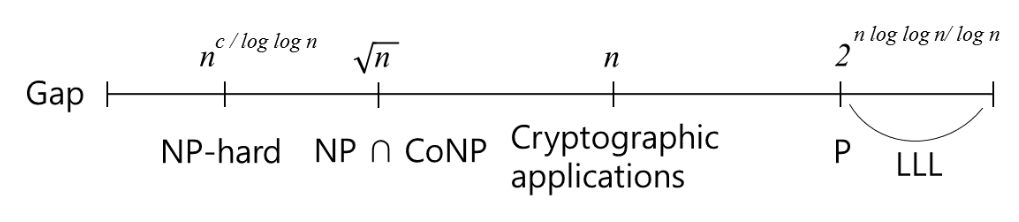

### SVP

**SVP**  
Given an arbitrary basis $B$ find a shortest nonzero lattice vector $v \in \mathcal{L}, \|v\| = \lambda_1(\mathcal{L})$

**ApprSVP**  
Given an arbitrary basis $B$ find a shortest nonzero lattice vector $v \in \mathcal{L}, \|v\| < \gamma(n) \lambda_1(\mathcal{L})$ for some approx factor $\gamma$

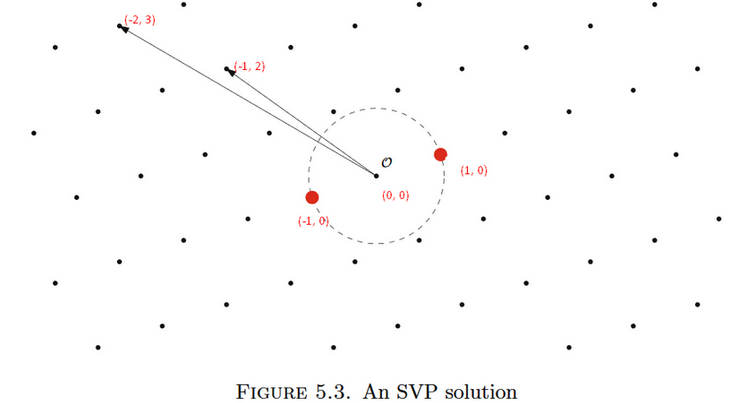

In [11]:
M = matrix([[-1, 2], [-2, 3]])
L = IntegerLattice(M)

In [12]:
L.shortest_vector()

(-1, 0)

### CVP

**CVP**  
Given an arbitrary basis $B$ and a vector $w \in \mathbb{R}^n$ find the closest lattice vector $v \in \mathcal{L}, \|v-w\|$ is short

**ApprCVP**  
Given an arbitrary basis $B$  and a vector $w \in \mathbb{R}^n$ find the closest lattice vector $v \in \mathcal{L}, \|v-w\| < \gamma(n) \cdot \text{short}$

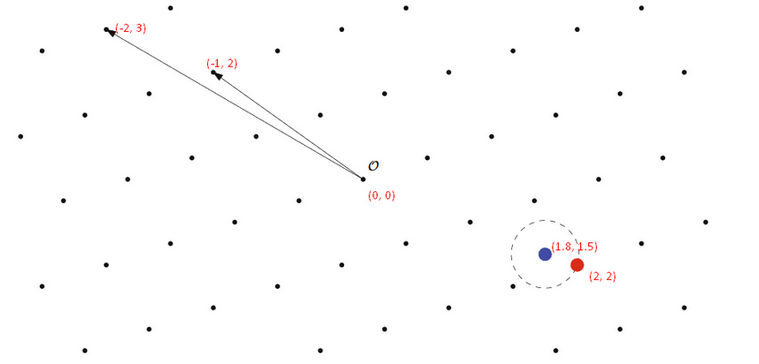

In [32]:
M = matrix([[-1, 2], [-2, 3]])
L = IntegerLattice(M)

In [37]:
w = vector([1.8, 1.5])
L.closest_vector(w)

(2.00000000000000, 2.00000000000000)

### BDD

> Given an arbitrary basis $B$, a vector $w \in \mathbb{R}^n$ and a real number $d \in mathbb{R}$ find a lattice vector s.t $v \in \mathcal{L}, \|w-v\| < d \cdot \lambda_1(\mathcal{L})$ 

## Bounds

### Minkowski's theorem

- https://en.wikipedia.org/wiki/Minkowski%27s_theorem

**Minkowski theorem**:  
Let $\mathcal{L} \subset \mathbb{R}^n, \dim \mathcal{L} = n$;  
$C \subset \mathbb{R}^n, C = $ bounded symmetrical convex set whose volume satisfies $$\text{Vol}(C) > 2^n\det(\mathcal{L})$$

Then $C$ contains a nonzero lattice vector

*Intuition*
- If the volume of the symmetric body is big enough it will contain a lattice vector.
- https://www.youtube.com/watch?v=tZx7K0Or70Y&list=PLgKuh-lKre12CuCYPwpfH77-K6U_3JweQ - watch 12 mins for intuition
- https://youtu.be/21IzHN9-CjE?t=1891 - Or 5 mins from here

**Corollary**
$\lambda_1 \leq \left(\prod_i\lambda_i(\mathcal{L}\right)^{\frac 1 n} \leq(\mathcal{L}) \leq \sqrt{n} \cdot \det(\mathcal{L})^{\frac 1 n}$

VolVol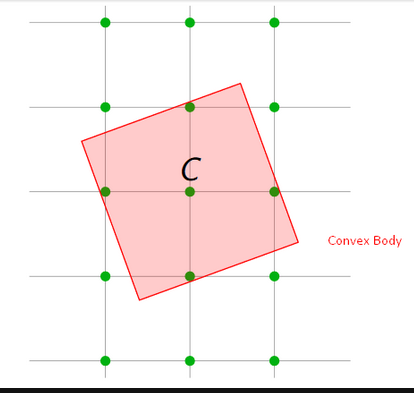
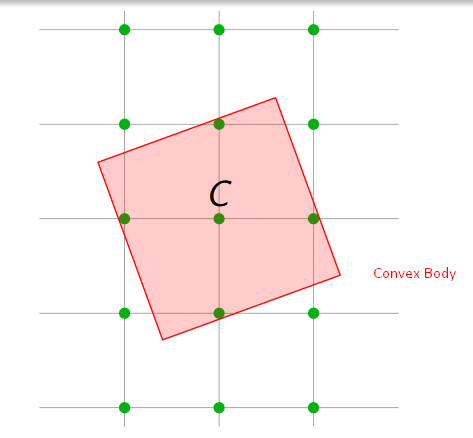

# Resources

- [Lattice Based Cryptography for Beginners](https://eprint.iacr.org/2015/938.pdf)
- [A Decade of Lattice Cryptography - Chris Peikert](https://web.eecs.umich.edu/~cpeikert/pubs/lattice-survey.pdf)
- https://www.math.auckland.ac.nz/~sgal018/crypto-book/crypto-book.html - lattice part 
- [fpylll software](https://buildmedia.readthedocs.org/media/pdf/fpylll/latest/fpylll.pdf)
- [Cosic blog](https://www.esat.kuleuven.be/cosic/blog/introduction-to-lattices/)
